## **Correlação entre gastos com saúde e melhora do sistema**

### Este estudo visa entender a correlação entre gastos e qualidade dos sistemas de saúde pelo mundo a fora. A ideia é buscar padrões de correlações entre essas duas variáveis.

### Como resultado, verificou-se que aumentar os gastos como percentual do PIB melhora o sistema, mas que os retornos são decrescentes.



---



## Vamos ao código:

## Bibliotecas utilizadas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
import gspread

In [3]:
import plotly.express as px
import plotly.graph_objects as go

In [4]:
import matplotlib.colors as colors

## Carregando os dados que já estão organizados em uma planilha

In [5]:
url = "https://docs.google.com/spreadsheets/d/1nPQZP1p-tU3Iw7gLDRQUBV7X1aQSioqw36EOU-fW8Z0/export?format=csv"
df = pd.read_csv(url)

In [6]:
df.head()

,country,index1,gméd1,gméd%1,Unnamed: 4,index,gméd,gméd%
0,United States,"72,7","15,57583427","15,58",NaN,72.7,15.575834,15.58
1,Sierra Leone,"39,1","11,73723993","11,74",NaN,39.1,11.737240,11.74
2,France,"80,4","10,84335114","10,84",NaN,80.4,10.843351,10.84
3,Germany,"81,1","10,81132952","10,81",NaN,81.1,10.811330,10.81
4,Switzerland,"82,4","10,31888635","10,32",NaN,82.4,10.318886,10.32


## Fazendo uns ajustes finais antes de trabalhar os dados

### especificando as colunas de dados que queremos da tabela original:

In [7]:
#quero apenas as colunas country, gméd, gméd%
df = df[['country', 'index', 'gméd%']]

In [8]:
df.head()

,country,index,gméd%
0,United States,72.7,15.58
1,Sierra Leone,39.1,11.74
2,France,80.4,10.84
3,Germany,81.1,10.81
4,Switzerland,82.4,10.32


In [9]:
# Converter os tipos de dados para os corretos
df['index'] = df['index'].astype(float)
df['gméd%'] = df['gméd%'].astype(float)

## Veja como ficou:

In [10]:
df.head()

,country,index,gméd%
0,United States,72.7,15.58
1,Sierra Leone,39.1,11.74
2,France,80.4,10.84
3,Germany,81.1,10.81
4,Switzerland,82.4,10.32


## A seguir, vou começar a trabalhar os dados.



---



## Vou criar um mapa para visualizar algumas coisas interessantes:

## 1- Melhores sistemas de saúde do mundo:

In [15]:
# Create the choropleth map
fig_map = px.choropleth(
    df,
    locations="country",
    locationmode="country names",
    color="index",
    color_continuous_scale=["lightgreen", "limegreen","seagreen",  "darkgreen"],
    range_color=(0, 100),
    title='Melhores Sistemas de Saúde',
    labels={'index':'Qualidade do Sistema de Saúde'},
    hover_name="country"
)

# Customize the layout
fig_map.update_layout(
    geo_scope='world',
    geo_showframe=False,
    geo_showcoastlines=True,
    geo_coastlinecolor='darkgray',
    geo_countrycolor='darkgray'
)

# Display the map
fig_map.show()

## Os melhores sistemas estão nos países mais ricos. Sobretudo nos europeus e no Japão.



---



#### O trecho a seguir serve para salvar o mapa interativo criado.

In [ ]:
# Salva o gráfico como um arquivo HTML
fig_map.write_html("/content/grafico_interativo-saúde_map.html")
from google.colab import files
files.download('/content/grafico_interativo-saúde_map.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



---



## Gráfico do percentual de gastos em relação ao PIB com saúde

In [12]:
fig_map0 = px.choropleth(
    df,
    locations="country",
    locationmode="country names",
    color="gméd%",
    color_continuous_scale= ["lightblue", "navy"],
    range_color=(0, 20),
    title="Gastos em saúde (% do PIB) por país",
    labels={"gméd%": "Qualidade do Sistema de Saúde"},
    hover_name="country"
)

# Personalize o layout
fig_map0.update_layout(
    geo_scope="world",
    geo_showframe=False,
    geo_showcoastlines=True,
    geo_coastlinecolor="darkgray",
    geo_countrycolor="darkgray",
    coloraxis_colorbar=dict(title="Percentual do PIB")
)

# Exiba o mapa
fig_map0.show()

In [ ]:
# Salva o gráfico como um arquivo HTML
fig_map0.write_html("/content/grafico_interativo-Gastos_map.html")
from google.colab import files
files.download('/content/grafico_interativo-Gastos_map.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



---



## Verificar umas estatísticas descritivas básicas para me familiarizar com os dados:

### Dados gerais da amostra:

In [16]:
# Análise descritiva das variáveis
df.describe()

,index,gméd%
count,161.000000,161.000000
mean,54.165839,6.049503
std,16.636023,2.375571
min,13.100000,1.160000
25%,40.600000,4.270000
50%,54.600000,5.590000
75%,65.800000,8.020000
max,83.800000,15.580000


### Distribuição da qualidade:

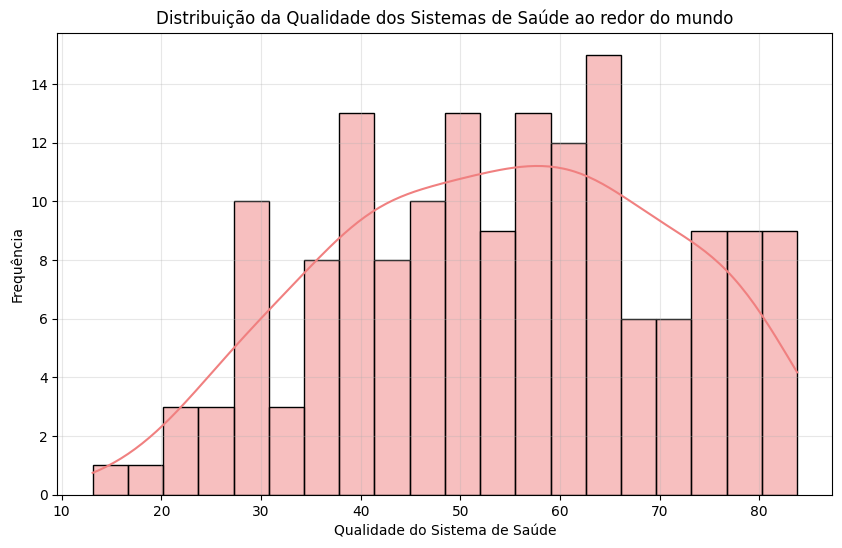

In [17]:
# Histograma da qualidade do sistema de saúde (index)
plt.figure(figsize=(10, 6))
sns.histplot(df['index'], bins=20, kde=True, color='lightcoral')
plt.title('Distribuição da Qualidade dos Sistemas de Saúde ao redor do mundo')
plt.xlabel('Qualidade do Sistema de Saúde')
plt.ylabel('Frequência')
plt.grid(True, alpha=0.3)
plt.show()

## Veja o Box-plot disso

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



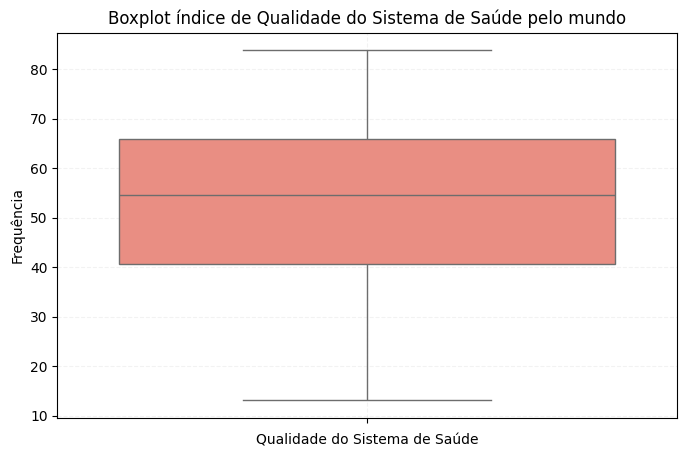

In [19]:
# Boxplot das variáveis para visualização de outliers
plt.figure(figsize=(8, 5))
sns.boxplot(y='index', data=df, color='salmon')
plt.title('Boxplot índice de Qualidade do Sistema de Saúde pelo mundo')
plt.xlabel('Qualidade do Sistema de Saúde')
plt.ylabel('Frequência')
plt.grid(True, alpha=0.05, linestyle = '--', color = 'black')
plt.show()

## Distribuição dos gastos com saúde como percentual do PIB por país

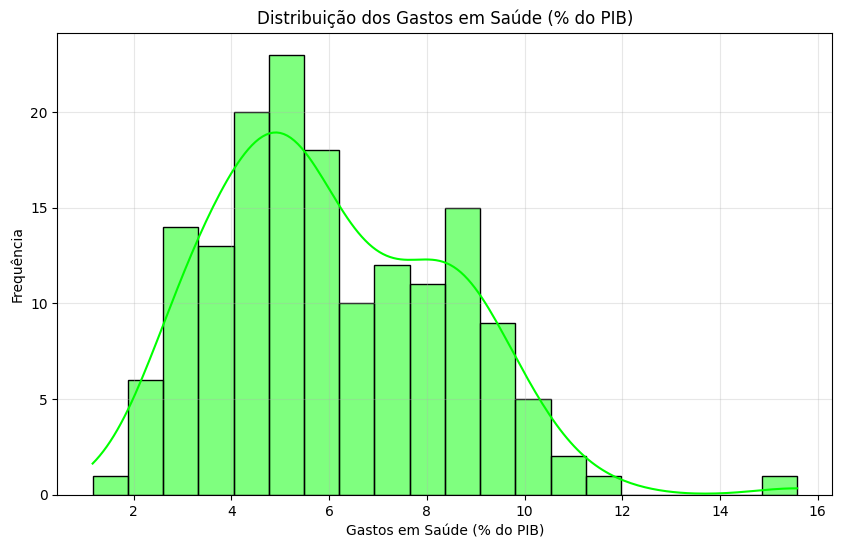

In [20]:
# Histograma dos gastos como percentual do PIB (gméd%)
plt.figure(figsize=(10, 6))
sns.histplot(df['gméd%'], bins=20, kde=True, color='lime')
plt.title('Distribuição dos Gastos em Saúde (% do PIB)')
plt.xlabel('Gastos em Saúde (% do PIB)')
plt.ylabel('Frequência')
plt.grid(True, alpha=0.3)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning:

SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.



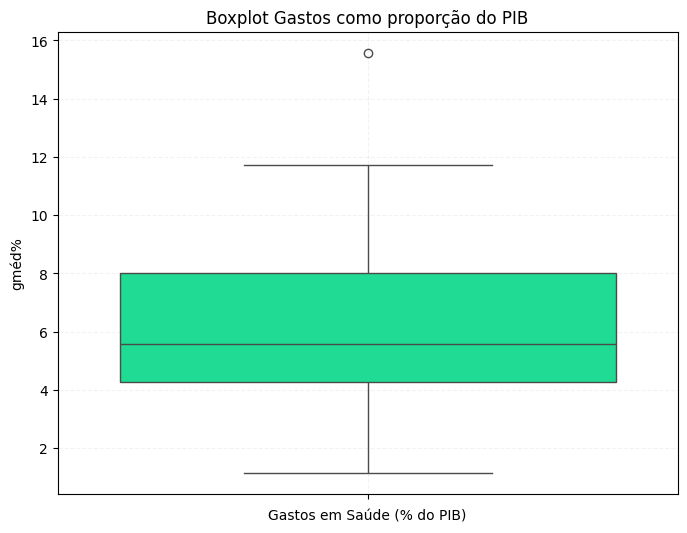

In [24]:
# Boxplot das variáveis para visualização de outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y='gméd%', data=df, color='mediumspringgreen')
plt.title('Boxplot Gastos como proporção do PIB')
plt.xlabel('Gastos em Saúde (% do PIB)')
plt.grid(True, alpha=0.05, linestyle = '--', color = 'black')
plt.show()

### Esse outlier observado são os EUA.

### 5 países com maiores gastos como percentual do PIB:

In [25]:
#vou escrever os 5 maiores gastos
x_maiores = df.nlargest(5, 'gméd%')
x_maiores

,country,index,gméd%
0,United States,72.7,15.58
1,Sierra Leone,39.1,11.74
2,France,80.4,10.84
3,Germany,81.1,10.81
4,Switzerland,82.4,10.32


### 5 países com menores gastos como percentual do PIB

In [26]:
#veja os 5 piores com menos gastos
x_menores = df.nsmallest(5, 'gméd%')
x_menores

,country,index,gméd%
160,South Sudan,13.1,1.16
159,Libya,54.3,2.10
158,Equatorial Guinea,40.6,2.20
157,Papua New Guinea,38.4,2.42
156,Syria,50.1,2.44




---



---



## Estudo da correlação

### Dispersão qualidade do sistema vs. gastos

## Vejamos isso em um gráfico:

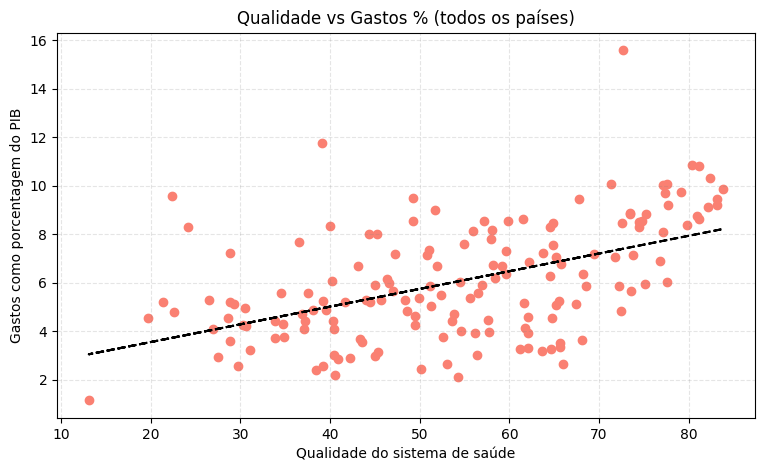

In [32]:
## colocar uma dispersão de index vs gméd%
plt.figure(figsize=(9, 5))
plt.scatter(df['index'], df['gméd%'], c = 'salmon')
plt.xlabel('Qualidade do sistema de saúde')
plt.ylabel('Gastos como porcentagem do PIB')
plt.title('Qualidade vs Gastos % (todos os países)')
plt.grid(True, alpha = 0.2, linestyle ='--', color = 'gray')

#colocar uma linha de tendência
z = np.polyfit(df['index'], df['gméd%'], 1)
p = np.poly1d(z)
plt.plot(df['index'], p(df['index']), linestyle = '--', color='black')
plt.show()

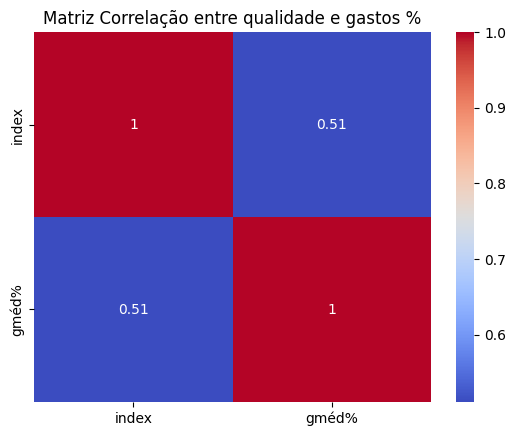

In [33]:
# matriz correlação entre colunas index e gméd%
corr = df[['index', 'gméd%']].corr()
#gráfico da matriz correlação
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz Correlação entre qualidade e gastos %')
plt.show()

### Veja que a correlação linear entre gastos e qualidade do sistema é de 51%. Indicando correlação de moderada à forte.

### Isso significa que há uma relação notável entre aumento de gastos e aumento da qualidade. Porém, note que existe sim uma dispersão um tanto aleatória em alguns pontos, o que indica uma relação longe de ser perfeitamente direta entre os dois fatores.

### Média de gastos como percentual do PIB da amostra

In [37]:
#calcular a média de gméd% dos países (toda a amostra)
media_gméd = df['gméd%'].mean()
print(round(media_gméd, 2),'%')

6.05 %


### Qualidade média dos sistemas de saúde da amostra:
Escala de 0 a 100

In [41]:
#calcular média de qualidade (toda a amostra)
media_index = df['index'].mean()
print(round(media_index, 2),'pontos')

54.17 pontos




---



## Vou realizar alguns filtros. A ideia é verificar o que ocorre com a correlação conforme aumentamos a qualidade do sistema de saúde analisado da amostra.

## Isso servirá para verificar se conforme aumentamos os gastos a qualidade acompanha ou não isso.

## **Filtragem 1:** Países com qualidade acima da média geral da amostra

In [44]:
#listar os países acima da média em index
paises_a_index = df[df['index'] > media_index]
print('Qtde de países com índice de qualidade acima da média geral da amostra:', len(paises_a_index), 'países')
print()
print("Veja alguns deles:")
paises_a_index.head()

Qtde de países com índice de qualidade acima da média geral da amostra: 83 países

Veja alguns deles:


,country,index,gméd%
0,United States,72.7,15.58
2,France,80.4,10.84
3,Germany,81.1,10.81
4,Switzerland,82.4,10.32
5,Canada,71.3,10.08


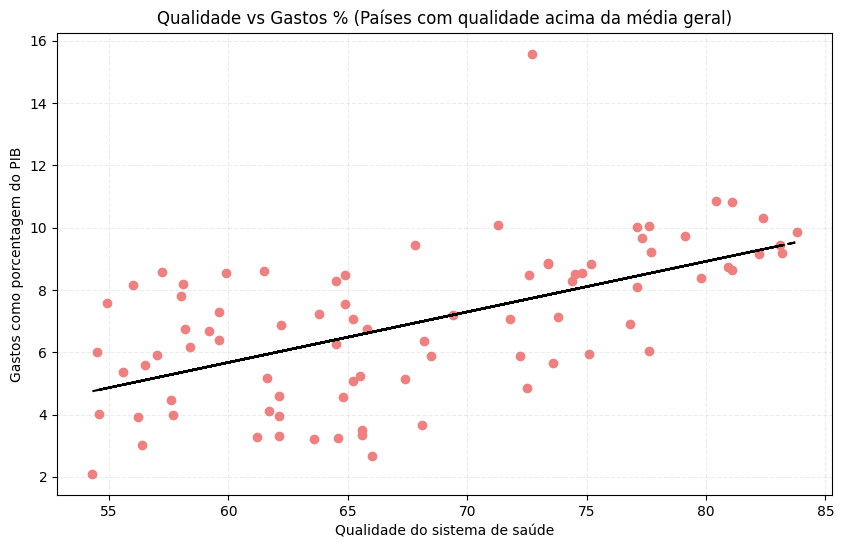

In [46]:
#vou colocar um gráfico de dispersão com os dados de países paises_a_index
plt.figure(figsize=(10, 6))
plt.scatter(paises_a_index['index'], paises_a_index['gméd%'], c = 'lightcoral')
plt.xlabel('Qualidade do sistema de saúde')
plt.ylabel('Gastos como porcentagem do PIB')
plt.title('Qualidade vs Gastos % (Países com qualidade acima da média geral)')
plt.grid(True, alpha = 0.15, linestyle ='--', color = 'gray')

#colocar uma linha de tendência
z = np.polyfit(paises_a_index['index'], paises_a_index['gméd%'], 1)
p = np.poly1d(z)
plt.plot(paises_a_index['index'], p(paises_a_index['index']), linestyle = '--', color='black')
plt.show()


<Axes: >

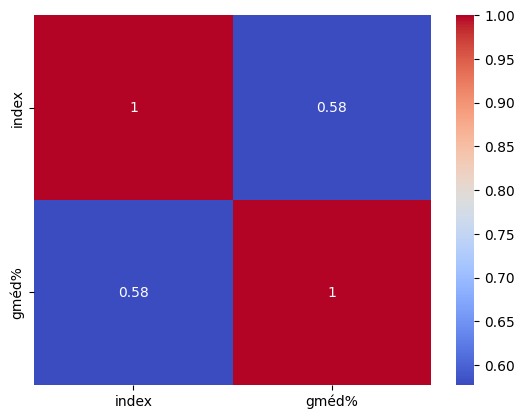

In [47]:
#calcular a matriz correlação para paises_a_index0
corr0 = paises_a_index[['index', 'gméd%']].corr()
#gráfico da matriz de correlação
sns.heatmap(corr0, annot=True, cmap='coolwarm')

## Acorrelação aumentou inicialmente. Isso indica que gastos acima da média em saúde devem levar à melhora do sistema de um país.



---



## Vou realizar um novo afunilamento da amostra, filtrando-a para pegar os países com melhor desempenho do sistema de saúde. A ideia é verificar se a correlação continua diminuindo.

## Filtragem 2: Países com boa qualidade de sistema (países com qualidade bem acima da média)

In [48]:
media_index0 = paises_a_index['index'].mean()
print('Média de qualidade desses países com boa qualidade do sistema:', round(media_index0,2), 'pontos')

Média de qualidade desses países com boa qualidade do sistema: 67.68 pontos


## Veja os países

In [50]:
#listar os países acima da média em index
paises_a_index0 = df[df['index'] > media_index0]
print('Qtde de países com bom índice de qualidade:', len(paises_a_index0), 'países')
print()
print("Veja alguns deles:")
paises_a_index0.head()

Qtde de países com bom índice de qualidade: 38 países

Veja alguns deles:


,country,index,gméd%
0,United States,72.7,15.58
2,France,80.4,10.84
3,Germany,81.1,10.81
4,Switzerland,82.4,10.32
5,Canada,71.3,10.08


## Nessa nova filtragem saímos de 83 para 38 países. Essses são os 38 com melhores sistemas de saúde. Eles têm índice de qualidade acima dos 67 pontos (numa escala de 0 a 100 de qualidade)

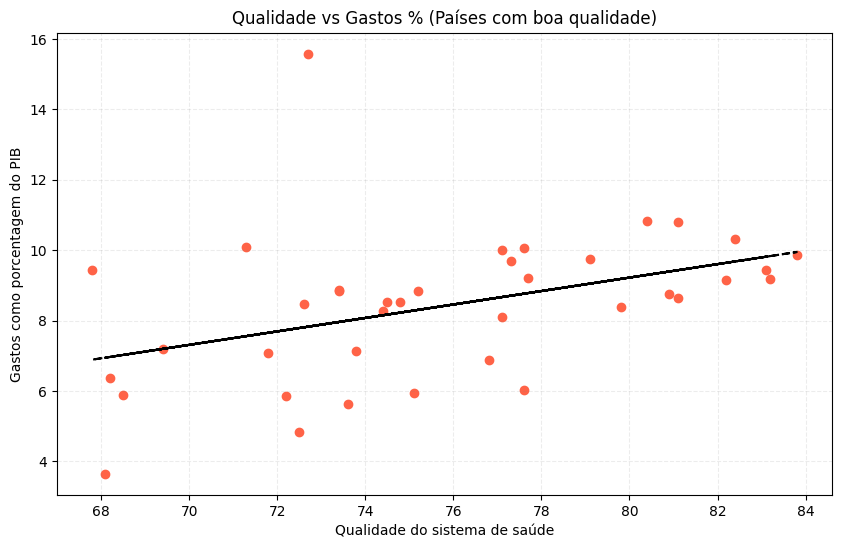

In [52]:
#vou colocar um gráfico de dispersão com os dados de países paises_a_index0
plt.figure(figsize=(10, 6))
plt.scatter(paises_a_index0['index'], paises_a_index0['gméd%'], c = 'tomato')
plt.xlabel('Qualidade do sistema de saúde')
plt.ylabel('Gastos como porcentagem do PIB')
plt.title('Qualidade vs Gastos % (Países com boa qualidade)')
plt.grid(True, alpha = 0.15, linestyle ='--', color = 'gray')


#colocar uma linha de tendência
z = np.polyfit(paises_a_index0['index'], paises_a_index0['gméd%'], 1)
p = np.poly1d(z)
plt.plot(paises_a_index0['index'], p(paises_a_index0['index']), linestyle = '--', color='black')
plt.show()

## Matriz correlação:

<Axes: >

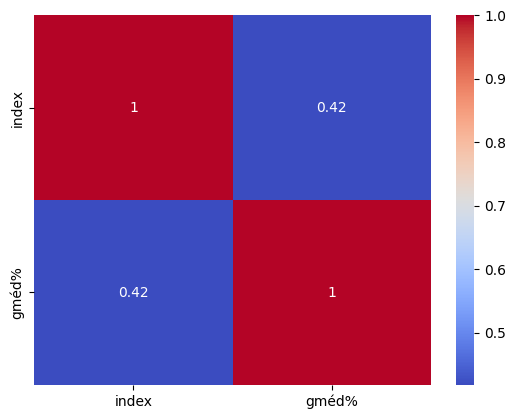

In [53]:
#vou calcular a matriz correlação para paises_index0
corr0 = paises_a_index0[['index', 'gméd%']].corr()
#gráfico da matriz de correlação
sns.heatmap(corr0, annot=True, cmap='coolwarm')

### A matriz de correlação e o gráfico de dispersão demonstram uma queda de 0.9 pontos na correlação entre gastos como porcentagem do PIB e qualidade do sistema de saúde.
### Trata-se de um índice levemente menor que o verificado para toda a amostra
### Lembre-se: amostra toda: 83 países; amostra depois da primeira filtragem de qualidade: 38 países.

### Esse índice de correlação pode ser interpretado como uma correlação moderada e positiva entre os gastos e qualidade.




---



## Agora vamos analisar a correlação para os 20 países com sistemas de saúde mais desenvolvidos do mundo.

## Filtragem 3: 20 melhores sistemas de saúde

In [54]:
paises_top = paises_a_index0.nlargest(20, 'gméd%')
paises_top

,country,index,gméd%
0,United States,72.7,15.58
2,France,80.4,10.84
3,Germany,81.1,10.81
4,Switzerland,82.4,10.32
5,Canada,71.3,10.08
6,Cuba,77.6,10.06
7,Austria,77.1,10.01
8,Belgium,83.8,9.87
9,Denmark,79.1,9.74
10,Netherlands,77.3,9.68


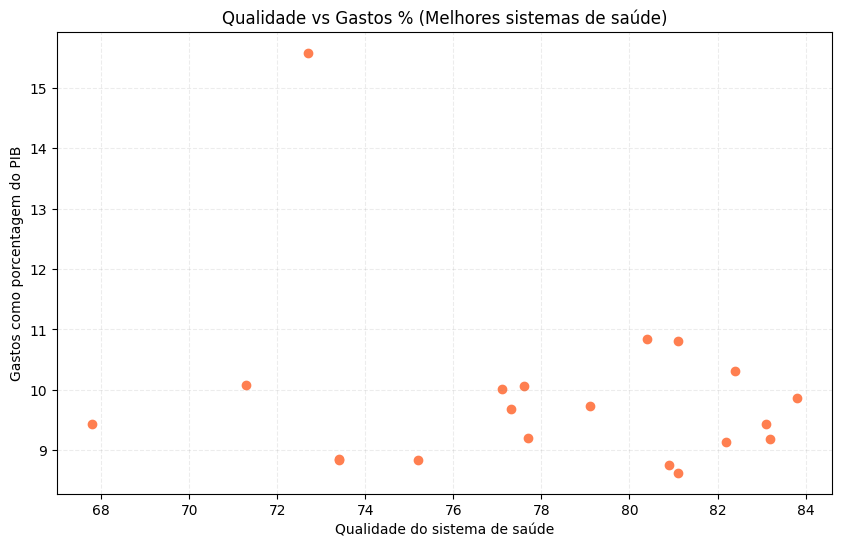

In [56]:
#gráfico de dispersão com os paises_top
plt.figure(figsize=(10, 6))
plt.scatter(paises_top['index'], paises_top['gméd%'], c = 'coral')
plt.xlabel('Qualidade do sistema de saúde')
plt.ylabel('Gastos como porcentagem do PIB')
plt.title('Qualidade vs Gastos % (Melhores sistemas de saúde)')
plt.grid(True, alpha = 0.15, linestyle ='--', color = 'gray')

plt.show()

### Veja que para esse nova filtragem os dados parecem dispersões, perdendo aquele padrão de crescimento. A relação positiva aqui paraece não existir mais, para esses países com sistemas melhores. Isto é, parece existir uma maior aleatoriedade e não uma relação positiva, como antes.

### Matriz correlação para os melhores sistemas:

<Axes: >

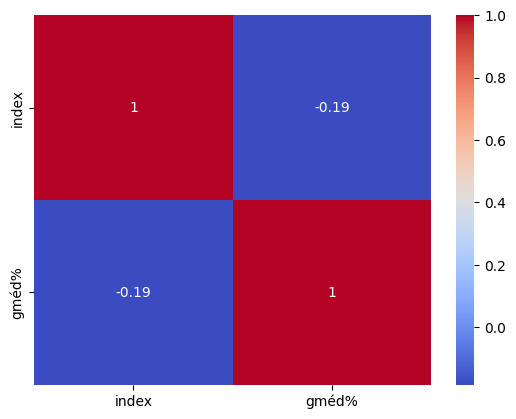

In [57]:
#criar a matriz de correlação com paises-top
corr_top = paises_top[['index', 'gméd%']].corr()
#gráfico da matriz de correlação
sns.heatmap(corr_top, annot=True, cmap='coolwarm')

### Oresultado obtido a partir dessa matriz de correlação confirma nossa ideia. Veja que interessante: Quando filtramos a correlação para os 20 melhores sistemas, o resultado da correlação fica "negativa". Note que é uma negativa linear fraquíssima que pode ser interpretada da seguinte forma: à medida que os gastos como percentual do PIB aumentam, para esse grupo dos melhores, há uma leve tendência de queda da qualidade, mas essa tendência é muito muito fraca.

## O importante é notar que a correlação tende a cair conforme lidamos com sistemas de saúde mais desenvolvidos!



---



## **Conclusão:**

## A correlação entre gastos e qualidade diminui para os melhores sistemas de saúde do mundo. Indicando que gastos e qualidade têm a ver, mas os retornos sobre a qualidade são cada vez menores conforme aumentamos a qualidade dos sistemas.
## Na economia, chamamos esse fenômeno de Rendimentos Marginais Decrescentes. Ou seja, os retornos do aumento de gastos com saúde diminuem conforme os países apresentam sistemas de saúde mais desenvolvidos.


## Dessa forma, os dados confirmam:
* ### países com sistemas de saúde mais desenvolvidos precisam focar mais em eficiência e qualidade que na quantidade de gastos!
* ### países com sistemas ruins e gastos abaixo da média, precisam buscar aumentar os gastos, já que países com gastos acima da média mundial de fato têm melhores desempenhhos no quesito, mas sobretudo se preocuparem com a eficiência deles.


##  O segredo novamente parece estar no equilíbrio e na busca pela combinação perfeita entre qualidade e quantidade. O nível correto de gastos não tem um padrão, depende das demandas da sociedade. O universal é que: eficência é o segredo!

END.